# 2 Linear Regression

In [41]:
import pandas as pd
import numpy as np

## Data preparation

In [42]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [43]:
!!wget $data 

["Prepended http:// to 'wget'",
 '--2025-10-08 15:11:20--  http://wget/',
 'Resolving wget (wget)... failed: nodename nor servname provided, or not known.',
 'wget: unable to resolve host address ‘wget’',
 '--2025-10-08 15:11:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 874188 (854K) [text/plain]',
 'Saving to: ‘car_fuel_efficiency.csv.4’',
 '',
 '     0K .......... .......... .......... .......... ..........  5% 1.34M 1s',
 '    50K .......... .......... .......... .......... .......... 11% 4.37M 0s',
 '   100K .......... .......... .......... .......... .......... 17% 2.04M 0s',
 '   150K .......... .......... .......... .......

In [44]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [45]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [46]:
df.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [47]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [48]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
# after
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

## EDA

In [49]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

[]

In [50]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [51]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [52]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

Check missing values

In [53]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [54]:
median_hp = df['horsepower'].median()
print(f"Median of horsepower': {median_hp}")

Median of horsepower': 149.0


Distribution of `fuel_efficiency_mpg`

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

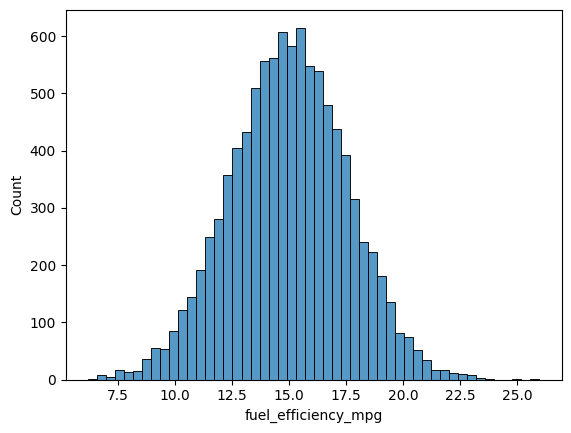

In [56]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

## Setting up the validation framework

In [57]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f"n_train: {n_train}, n_val: {n_val}, n_test: {n_test}")

n_train: 5824, n_val: 1940, n_test: 1940


In [58]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [59]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [60]:
df_train.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [61]:
df_val.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419


In [62]:
df_test.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
5922,190,128.0,2705.833636,2014,16.485991
1343,230,156.0,2505.939657,2005,17.779704


In [63]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

Reset indexes

In [64]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [65]:
df_train.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


Creating Y 

In [66]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [67]:
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)

y_train: [2.8703359  2.85061269 2.97511223 ... 2.92279789 2.99201277 2.94261017]
y_val: [2.79522685 2.74734667 2.58377354 ... 2.68192023 2.69011317 2.82233377]
y_test: [2.82163803 2.72604557 2.54540897 ... 2.96550163 3.06816735 2.88011043]


## Linear regression

In [68]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [69]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [70]:
# filled with zeros
X_train = df_train.fillna(0).values
print("X_train: ", X_train)

w0, w = train_linear_regression(X_train, y_train)
print("w0: ", w0)
print("w: ", w)

y_pred = w0 + X_train.dot(w)
print("y_pred:", y_pred)

X_train:  [[ 220.          144.         2535.88759124 2009.        ]
 [ 160.          141.         2741.17048439 2019.        ]
 [ 230.          155.         2471.88023726 2017.        ]
 ...
 [ 210.          152.         2500.17568746 2020.        ]
 [ 250.          154.         2254.31324473 2002.        ]
 [ 210.          152.         2435.20360628 2004.        ]]
w0:  3.66466624731171
w:  [ 2.14827083e-06  2.21209296e-04 -3.23460699e-04  1.64673231e-05]
y_pred: [2.90981589 2.84278709 2.93310627 ... 2.92329662 3.00305539 2.94404905]


<Axes: ylabel='Count'>

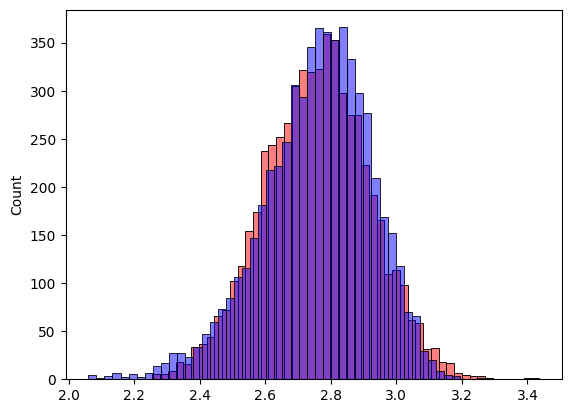

In [71]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE

In [72]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [73]:
print("RMSE: ", round(rmse(y_train, y_pred), 2))


RMSE:  0.04


## Validating the model

In [74]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [75]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print("Validated RMSE (zeros): ", round(rmse(y_val, y_pred),2))

Validated RMSE (zeros):  0.04


In [76]:
def prepare_X_mean_fill(df, hp_mean):
    df = df.copy()
    df.horsepower = df.horsepower.fillna(hp_mean)
    X = df.values
    return X

In [77]:
hp_mean = df_train.horsepower.mean()

X_train_mean = prepare_X_mean_fill(df_train, hp_mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X_mean_fill(df_val, hp_mean)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
print("Validated RMSE (fill with mean):", round(rmse(y_val, y_pred_mean), 2))

Validated RMSE (fill with mean): 0.04
